# Lab 5: Sensing Part 2
### EECS 16B: Designing Information Devices and Systems II, Spring 2024

Content inspired by EECS 16B Spring 2022, Spring 2023 Lab 5

Created by Junha Kim, Ryan Ma, Jessica Fan, Venkata Alapati (2024) 

## Table of Contents

* [Part 0: Before you Begin](#part0)
* [Part 1: High Pass Filter](#part1)
* [Part 2: LRC Filter](#part2)
* [Part 3: Cascading Band Pass](#part3)
* [Part 3: Checkoff](#checkoff)
* [Part 4: Midterm Lab Report Questions](#part4)


# <span style="color:navy">Introduction</span>
-----
Welcome to Lab 5! In this lab, we will be taking a break away from your S1XT33N car and looking at different filters, their implementations, and their outputs. This will be the last lab in the EECS 16B where you will be working with circuits, and as such, we will **NOT** be giving you the schematic for the majority of your circuits. 

## **Please draw the schematic for each section before implementing it on your breadboard!! TAs and ASEs will be asking for the schematic before fulfilling any help request**

## Lab Note
<!-- LINK_LAB_NOTE_5-->
* [Lab Note 5](http://links.eecs16b.org/lab5-note)<!-- LINK_LAB_NOTE_5-->

Review the lab note. The lab note provides a technical review of the concepts covered in lab as well as theoretical connections. **You should read the lab notes before your lab section.** They serve as a review and will be helpful as a reference during section.


## Pre-Lab

Complete the pre-lab assignment before doing the lab. Submit your answers to the Gradescope assignment "Prelab 5." Please make sure that you submit to the correct assignment. Pre-Lab 5 is due on **February 21 at 11:59pm**. No late submissions will be accepted.

## Help Request Form
Use this [form](https://eecs16b.org/lab-help) to request help in your debugging / conceptual needs.

<a id='part0'></a>
# <span style="color:navy">Part 0: Before you Begin</span>
-----

## Project Breadboard Layout
You will be building Lab 5 separate from your car breadboard. Please use the breadboard at your station or get a breadboard from a TA.

The general schematic for this week's lab is shown below. Recall how you designed your low-pass filter last week. We're now going to apply that skill in building more filters! 

<br>
<img width="500px" src="images/color organ final.png">

**REFER TO THIS BLOCK DIAGRAM OFTEN! AGAIN, WE WILL NOT BE PROVIDING A DETAILED SCHEMATIC FOR THIS LAB, SO IT IS UP TO YOU TO DESIGN TO SCHEMATIC AND IMPLEMENT IT. IF YOU NEED HELP FOR DESIGNING PARTS OF THE LAB, REFER TO THE LAB NOTES AND THIS BLOCK DIAGRAM.**

### Powering your breadboard
We're going to be using an input signal with $6 V_{pp}$ centered at $0 V$ for our function generator.

#### Quick Review of Voltage
As you may remember from prior classes, voltage refers to the potential difference between two points or nodes in your circuit. This potential difference is what allows current to flow in a circuit. In this lab, we will be using a function generator to provide a voltage signal to our circuit. The function generator will provide a voltage signal with a peak-to-peak voltage of $6 V_{pp}$, which means that the voltage signal will oscillate between $3 V$ and $-3 V$. The idea of negative voltage may seem strange, but it is simply a convention that we use to describe the potential difference between two points. Traditionally, $GND$ is used to denote out $0V$ reference point, and voltages are measured relative to this point. This means that the "$-3 V$ node", the voltage is $3 V$ below $GND$, and likewise at the "$3 V$ node", the voltage is $3 V$ above $GND$. Hence we can say that the voltage between $-3 V$ and $3 V$ is $6 V$. Now if this seems trivial that is awesome! If not, don't worry, you will get used to it as you work with circuits more and don't hesitate to ask questions.

#### How can we access negative voltages?
Negative voltages can be generated by wiring our voltage source in reverse. Well luckly for us, the power supply in the lab for the $\pm 25V$ channel has both positive and negative terminals along with a common ground. We can use the negative terminal to provide the negative voltage to our circuit! The image below shows how the wiring can be completed! Here we need to set the $+25V$ channel to $+5V$ and the $-25V$ channel to $-5V$. This will allow us to have a $6V$ across the $\pm$ terminals of the power supply which covers our $6V_{pp}$ range.

<img width="500px" src="images/Negative Voltage Guide.png">

#### Review
Answer the following questions before you start the lab:

<span style="color:#075a04"> **1. What is the range that we set our function generator output?**</span>

`YOUR ANSWER HERE`

<span style="color:#075a04"> **2. Later in the lab, we will be building multiple op-amp buffers, and also a non-inverting op-amp with a gain of around 1.25-1.5. Knowing this (the non-inverting op-amp gain is important!), what should our Vdd and Vss be set to for our op-amps? If you are confused, refer back to how you found your Vdd and Vss values for lab 1.**</span>

`YOUR ANSWER HERE`

<span style="color:#075a04"> **3. We will power the breadboard with the power supply directly. What voltages are we using? Which power supply outputs are we using?**</span>

`YOUR ANSWER HERE`

<span style="color:#075a04"> **4. What's the easiest way to set up the breadboard power rails so our op amp is powered by Vdd?**</span>

`YOUR ANSWER HERE`

### <span style="color:red;font-weight:bold">CHECK YOUR ANSWERS WITH A TA BEFORE MOVING ONTO THE NEXT PART OF LAB!!!</span>

We have changed the norm for powering in this lab compared to prior labs. Please make sure you understand what we are doing with the power rails!

<a id='part1'></a>
# <span style="color:navy">Part 1: Setting up your High Pass Filter</span>

-----
In order to isolate our high pass filter, so that only it's LED turns on, we will make our cutoff frequency rather high, at 15kHz or above.

#### Materials
- Capacitor
- Resistor
- LED
- Oscilloscope probes
- Function Generator probes
- Power Supply

## Tasks

### 1.1. Design and Build the High-Pass Filter Circuit

<br>
<img width="500px" src="images/co_high_filter.png">

1. Recall the circuit diagram and cutoff frequency equation $f_c$ for a first-order high pass RC filter. Write down the schematic for the filter. **Lab staff will not help debug your circuit until you have the schematic.**

2. Choose values for $R$ and $C$ such that your cutoff frequency $f_c$ is greater than 15 kHz.
    
3. Record your values for $R$ and $C$ in the code below. Write code to calculate $f_c$ given your values for $R$ and $C$.

4. Build your filter on your breadboard. Make sure to leave enough room for the other circuits! 

#### Notes/Tips:
 
- Since we have far more resistor values than we have capacitor values, start by choosing an easy capacitor value. Pick one that lets you choose resistors of at least $1k\Omega$.
- Remember we stated our circuit was centered at 0V. To make a high-pass filter in "reference" to the 0V center, what do we use as a reference voltage here? 
- What woulld the rails of the op amps need to be set to in order to make the op-amp buffer work?

In [ ]:
### YOUR CODE HERE
highpass_R = ...
highpass_C = ...
highpass_f_c = ...

print("High pass filter")
print("================")
print("Resistor: {} ohms".format(highpass_R))
print("Capacitor: {} farads".format(highpass_C))
print("Cutoff frequency: {} Hz".format(highpass_f_c))

### 1.2. Test the High-Pass Filter

Similar to the low-pass filter, we'll test the high-pass filter with the function generator.

1. Set your function generator to output a sinusoid centered at $0V$ offset, $6V$ peak-to-peak voltage, and the frequency as the cutoff frequency of your high pass filter.

<span style="color:red;font-weight:bold">**Make sure you are on high-z mode!!! If it's not, your Op-amp will break, and we will be very sad :(** <span style="color:red;font-weight:bold">

2. Connect the function generator to the input of your high pass filter.
3. Probe the output of your high pass with your oscilloscope. Ensure the gain/attentuation at the cutoff frequency is what you expect.
4. Additionally try outputting a very low frequency and very high frequency, and see if the output changes as expected.

### 1.3. Plot the Frequency Response of the High-Pass-Filtered Mic Board
1. Probe the output of your filter with your oscilloscope.

Fill in your cutoff frequency for your high pass filter in the cell below and run it to plot the frequency response of an ideal high-pass filter. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
from pylab import * 
%matplotlib inline

In [ ]:
### TODO: Enter your high-pass cutoff frequency below inside the float() call. 
high_cutoff = float(...) # YOUR CODE HERE

x_freqs = range(100, 40000, 100)
hp_p2p_expected =  (np.array(x_freqs)) / (np.sqrt(np.array(x_freqs)**2 + high_cutoff**2))

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (High-Pass)")
plt.plot(x_freqs, hp_p2p_expected)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (High-Pass)")
plt.loglog(x_freqs, hp_p2p_expected)
plt.show()

Next, probe the output of your high-pass filter. For the given frequencies in `hp_freq_Vpp`, measure and record the peak-to-peak voltage values.

In [ ]:
# Record the amplitude of the output sinusoid at each given frequency. 
# Fill in your values here and replace the "..."s with your measured voltage values
hp_freq_Vpp = {
    500: ...,
    1000: ...,
    2500: ...,
    5000: ..., 
    8000: ..., 
    highpass_f_c: ...,
    10000: ..., 
    15000: ..., 
    22000: ..., 
    50000: ...,
    75000: ...,
}
hp_freqs = sorted(list(hp_freq_Vpp.keys()))
hp_p2p_observed = [hp_freq_Vpp[f] for f in hp_freqs]

hp_gain_observed = np.array(hp_p2p_observed)/np.max(hp_p2p_observed)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (High Pass)")
plt.plot(x_freqs, hp_p2p_expected)
plt.scatter(hp_freqs, hp_gain_observed)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (High Pass)")
plt.loglog(x_freqs, hp_p2p_expected)
plt.scatter(hp_freqs, hp_gain_observed)
plt.show()

### 1.4. Connecting an LED to the high-pass filter.
Refer to [Lab Note 5](https://links.eecs16b.org/lab5-note) about how "loading" works. To avoid this phenomenon, we build buffers between each "stage" of the circuit. In the case, we want to build a high-pass filter that leads into a LED. The first "stage" is the high-pass, and the second stage is the LED. The LED draws current, so it will "load" the circuit. We insert a buffer before the LED to make sure this does not happen. **Refer to appendix C in the lab note on how to build a buffer.**

**DO NOT USE THE WHITE LED AS IT REQUIRES A HIGHER CURRENT TO DRIVE!!!**

<br>
<img width="500px" src="images/co_high_full.png">

#### Steps:
1. Write down the schematic for the circuit so far by adding the buffer and LED to your high-pass filter schematic. **LAB STAFF WILL NOT HELP DEBUG YOUR CIRCUIT UNTIL YOU HAVE THE SCHEMATIC.**
1. Build the buffer, and connect the output of the High-Pass filter to the input of your buffer.
    1. **Make sure to power the op-amp for your buffer!** What should the Vdd and Vss values be?
2. Connect the output of your buffer to a 10 $\Omega$ resistor and LED in series.
    1. Recall that our signal is centered at 0V but our $V_{pp}$ is 6V. What does this mean for the rails of the op-amp? What does this mean for the ends of the LED?
    2. **REMINDER:** LEDs are diodes and HAVE DIRECTION. Make sure to place the LED in the correct orientation. The longer leg of the LED should be connected to the positive node, while the shorter leg of the LED should be connected to the negative node.
    
    
Now your High Pass Filter is finished! Set your function generator to **6 Vpp with 0V offset** As you change the frequency, you should notice the LED light up and turn off at different frequencies. Does the behavior of the LED match your expectation?

<span style="color:red;font-weight:bold">BY THIS POINT, YOU SHOULD HAVE A WORKING LED THAT LIGHTS UP AT HIGHER FREQUENCIES AND TURNS OFF AT LOWER FREQUENCIES. IF YOUR LED BEHAVIOR IS NOT WHAT YOU ARE EXPECTING, CHECK WITH A TA BEFORE MOVING ON.</span>

<a id='part2'></a>
# <span style="color:navy">Part 2: LCR Series Band-Pass</span>

-----
In this part, we will be building a band pass filter to pass a certain middle range of frequencies around a resonance frequency.

#### Materials
- 1x 3.3 mH inductor
- Capacitors
- 1000 $\Omega$ resistor
- 220 $\Omega$ resistor
- 51 $\Omega$ resistor
- Oscilloscope probes
- Function generator probes

## Tasks

### 2.1. Design and Build the LCR Band Pass Filter Circuit

<br>
<img width="500px" src="images/co_rlcbandpass_filter.png">

1. Recall the circuit diagram and resonance frequency equation $f_c$ for a series RLC band pass filter. Write down the schematic. **Again, lab staff will not help debug your circuit until you have the schematic.**
2. Since $L$ is 3.3 mH, choose $C$ such that your resonance frequency $f_c$ is roughly 9 kHz. Fill out the code block below. **Use $R=51\Omega$ for your resistor value for now.**
3. Build the LCR series band-pass filter. Make sure you leave enough room for your other filters.
4. Set your function generator to output a sinusoid centered at $0V$ and $6V$ peak-to-peak voltage, which will be the input to your filter. Measure the output of your filter with an oscilloscope.

In [ ]:
### YOUR CODE HERE
R_lcr = 51
L_lcr = ...
C_lcr = ...
f_c_lcr = 9000

print("LCR Series Band Pass filter")
print("================")
print("Resistor: {} ohms".format(R_lcr))
print("Inductor: {} henries".format(L_lcr))
print("Capacitor: {} farads".format(C_lcr))
print("Resonance frequency: {} Hz".format(f_c_lcr))

### 2.2. Thinking about the filter 

Before we start testing out our RLC Band-pass filter, we want you to think about how the filter will affect your frequency response.

<span style="color:#075a04"> **2.2.1. What should the frequency response of your band-pass filter look like? At which frequencies is the signal passed? When is it attenuatted? Where is it centered at?**</span>

`YOUR ANSWER HERE`

<span style="color:#075a04"> **2.2.2. Fill out the table below by calculating the Q factor for the given R values:**</span>

|$R$|Q factor|
|---|---|
|51 $\Omega$| ... |
|220 $\Omega$| ... |
|1000 $\Omega$| ... |

<span style="color:#075a04"> **2.2.3. What is the relationship between R and the Q factor? How will the Q factor affect the frequency response of your LCR filter?**</span>

`YOUR ANSWER HERE`

### 2.3. Plotting the Band-Pass

Now, you will be testing to see if your hypothesis about the frequency response of the bandpass filter is true. We will be repeating this process for 3 different resistor values: $51 \Omega, 220 \Omega,$ and $1000 \Omega$.

In the cell below, fill out the Vpp value for each frequency given. Repeat this three times, switching out your resistor to $51 \Omega, 220 \Omega,$ and $1000 \Omega$.

In [ ]:
# Record the amplitude of the output sinusoid at each given frequency. 

# Fill in your frequency response here by replacing elipses with the frequency,
# and replacing the "..."s with your measured voltage values

# Write down your freq and corresponding Vpp for 51 ohm resistor here
band_pass_freq_Vpp_51 = {
    500: ...,
    2000: ...,
    7000: ..., 
    f_c_lcr: ...,
    12500: ..., 
    20000: ..., 
    50000: ...,
    75000: ...,
    100000: ...,
}

# Write down your freq and corresponding Vpp for 220 ohm resistor here
band_pass_freq_Vpp_220 = {
    500: ...,
    2000: ...,
    7000: ..., 
    f_c_lcr: ...,
    12500: ..., 
    20000: ..., 
    50000: ...,
    75000: ...,
    100000: ...,
}

# Write down your freq and corresponding Vpp for 1000 ohm resistor here
band_pass_freq_Vpp_1000 = {
    500: ...,
    2000: ...,
    7000: ..., 
    f_c_lcr: ...,
    12500: ..., 
    20000: ..., 
    50000: ...,
    75000: ...,
    100000: ...,
}

In [ ]:
# Record the amplitude of the output sinusoid at each given frequency. 
# Fill in your values here and replace the "..."s with your measured voltage values
## TODO: fill out this block to plot for one of the R values you have not used

band_pass_freqs = sorted(list(band_pass_freq_Vpp_51.keys()))
band_pass_vals = [band_pass_freq_Vpp_51, band_pass_freq_Vpp_220, band_pass_freq_Vpp_1000]
labels = ['51 ohms', '220 ohms', '1000 ohms']

plt.figure(figsize=(10,6))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Band Pass)")

for i in range(len(band_pass_vals)):
    band_pass_p2p_observed = [band_pass_vals[i][f] for f in band_pass_freqs]
    band_pass_gain_observed = np.array(band_pass_p2p_observed)/np.max(band_pass_p2p_observed)

    plt.plot(band_pass_freqs, band_pass_gain_observed, label=labels[i])
    plt.scatter(band_pass_freqs, band_pass_gain_observed)
plt.legend()
plt.show()


plt.figure(figsize=(10,6))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Band Pass)")

for i in range(len(band_pass_vals)):
    band_pass_p2p_observed = [band_pass_vals[i][f] for f in band_pass_freqs]
    band_pass_gain_observed = np.array(band_pass_p2p_observed)/np.max(band_pass_p2p_observed)

    plt.loglog(band_pass_freqs, band_pass_gain_observed, label=labels[i])
    plt.scatter(band_pass_freqs, band_pass_gain_observed)
plt.legend()
plt.show()

#### <span style="color:#075a04"> **2.3.1 Compare the band pass filter's behavior across different values of $R$. What could explain the discrepancies? Does this match your hypothesis about Q factors earlier?**</span>

 `YOUR ANSWER HERE`

### <span style="color:red">Set the resistor to 220 ohms for now before moving onto the next part</span>

### 2.4. Connecting an LED to the band-pass


<br>
<img width="500px" src="images/co_rlcbandpass_full.png">

**THIS IS A REPEAT OF THE BUFFER YOU CREATED FOR THE HIGH-PASS FILTER!! You need to repeat this step (don't just use the high pass buffer/led)**

#### Steps:
1. Build the buffer, and connect the output of the Band-Pass filter to the input of your buffer.
    1. **Make sure to power the op-amp for your buffer!** What should the Vdd and Vss values be?
2. Connect the output of your buffer to a 10 $\Omega$ resistor and LED in series.
    1. Recall that our signal is centered at 0V but our $V_{pp}$ is 6V. What does this mean for the rails of the op-amp? What does this mean for the ends of the LED?
    2. **REMINDER:** LEDs are diodes and HAVE DIRECTION. Make sure to place the LED in the correct orientation. The longer leg of the LED should be connected to the positive node, while the shorter leg of the LED should be connected to the negative node.
    
    
Now your High Pass Filter is finished! Set your function generator to **6 Vpp with 0V offset** As you change the frequency, you should notice the LED light up and turn off at different frequencies. Does the behavior of the LED match your expectation?

<span style="color:red">BY THIS POINT, YOU SHOULD HAVE **TWO WORKING LEDS** THAT LIGHT UP AT DIFFERENT FREQUENCIES. IF YOUR LED BEHAVIOR IS NOT WHAT YOU ARE EXPECTING, CHECK WITH A TA BEFORE MOVING ON.</span>

<a id='part3'></a>
# <span style="color:navy">Part 3: RC Cascading Band-Pass</span>

-----
In this part, we will be building another band pass filter but using what you've learned about cascading filters. 

#### Materials
- Resistors
- Capacitors
- Oscilloscope probes
- Function generator probes
- Op-amp
- White LED

## Tasks

### 3.1. Design and Build the Second Order Band Pass Filter Circuit

<br>
<img width="500px" src="images/co_crrcbandpass_filter.png">


1. Recall the method to build a high-pass and low-pass filter. Also recall how we cascade filters. 
2. Build a second order band-pass filter using a high pass and low-pass with a passband of 2.5 kHz - 6 kHz. Fill in the code below to show your values.
3. Build the filter. Make sure you consider how much space you need for the filter (you need 2 buffers).
4. Set your function generator to output a sinusoid with a $0V$ offset and $6V$ peak-to-peak voltage, which will be the input to your filter. Prepare to measure the output of your filter with an oscilloscope.

In [ ]:
### YOUR CODE HERE
R_hp = ... # high pass
C_hp = ...
f_c1 = ... # cutoff for high pass

R_lp = ... # low pass
C_lp = ...
f_c2 = ... # cutoff for low pass

print("2nd Order Band Pass filter")
print("================")
print("High pass cutoff frequency: {} Hz".format(f_c1))
print("Low pass cutoff frequency: {} Hz".format(f_c2))

### 3.2. Plot the Frequency Response of the second order band pass
1. Based on your observations above, pick a few frequencies in the pass-band and a few outside of the pass band. 
2. Probe the output of your filter with your oscilloscope.

Fill in your the cutoff frequencies for your filter in the cell below and run it to plot the frequency response.

In [ ]:
# TODO: Fix the code here
# Record the amplitude of the output sinusoid at each given frequency. 
# Fill in your values here and replace the "..."s with your measured voltage values
band_pass_freq_Vpp = {
    500: ...,
    1000: ...,
    1500: ...,
    f_c1: ...,
    5000: ..., 
    f_c2: ...,
    8000: ..., 
    10000: ..., 
    17500: ..., 
    40000: ...,
    50000: ...,
}
casc_band_pass_freqs = sorted(list(band_pass_freq_Vpp.keys()))
band_pass_p2p_observed = [band_pass_freq_Vpp[f] for f in casc_band_pass_freqs]

band_pass_gain_observed = np.array(band_pass_p2p_observed)/np.max(band_pass_p2p_observed)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("Frequency vs Gain (Band Pass)")
plt.plot(casc_band_pass_freqs, band_pass_p2p_observed)
plt.scatter(casc_band_pass_freqs, band_pass_gain_observed)
plt.show()

plt.xlabel("Frequency (Hz)")
plt.ylabel("Output Voltage/Input Voltage")
plt.title("log-Frequency vs log-Gain (LCR Band Pass)")
plt.loglog(casc_band_pass_freqs, band_pass_p2p_observed)
plt.scatter(casc_band_pass_freqs, band_pass_gain_observed)
plt.show()

### 3.3. Add a Non-inverting Amplifier to the filter

<br>
<img width="500px" src="images/co_crrcbandpass_full.png">

This time, we want to drive a **white LED** at the output to show our filter's behavior. White LEDs require a higher current to turn on, so they need a higher voltage to drive them. Therefore, we want to add a non-inverting amplifier to this filter with a gain of ~1.25-1.5 rather than using only a buffer (you might have to adjust the gain to get the correct behavior!). For help on building the non-inverting amplifier, navigate to **Appendix C in lab note 5**. Choose the correct resistor values for building the filter (dont choose resistor values below 500 ohms!)

REMEMBER TO USE THE WHITE LED FOR THIS PART!

Steps:
1. Build the non-inverting amplifier, and connect the output of the CR-RC Band-Pass filter to the input of your buffer.
    1. **Make sure to power the op-amp for your buffer!** What should the Vdd and Vss values be?
2. Connect the output of your buffer to a 10 $\Omega$ resistor and LED in series.
    1. Recall that our signal is centered at 0V but our $V_{pp}$ is 6V. What does this mean for the rails of the op-amp? What does this mean for the ends of the LED?
    2. **REMINDER:** LEDs are diodes and HAVE DIRECTION. Make sure to place the LED in the correct orientation. The longer leg of the LED should be connected to the positive node, while the shorter leg of the LED should be connected to the negative node.

<span style="color:#075a04"> **3.3.1 Compare this CR-RC band-pass filter's to the RLC band-pass filter you created in part 2. Why might you use one filter over the other? List the pros and cons.**</span>

`YOUR ANSWER HERE`

<a id='checkoff'> </a>

# <span style="color:#ba190f">CHECKOFF</span>


### Checkoff Form (https://eecs16b.org/lab-checkoff)

- **Have all questions and plots completed in this notebook.**

- **Show your TA your working circuits:**
    - Show your frequency response plots of the high-pass filter. 
    - Show your frequency response plots of the two band-pass filters filter.
    - Demonstrate working system. Show the LEDs light up by scrolling the wheel on the function generator.

- **Be prepared to answer conceptual questions about the lab.**


**After checkoff, please:**

- Disassemble the circuits on the breadboard, and **return the breadboard and inductor and any op amps** back to the TA desk.

- Store all your electrical components in a neat and organized manner.
- Make sure that all components that you received in your lab kit are stored safely for use in future labs.

- Remember what each part of your circuit is for (Record this in a Google doc or somewhere else safe). You will need to write summaries for both the midterm and final lab reports!


<a id='part4'></a>
# <span style="color:navy">Part 4: Midterm Lab Report Questions</span>
-----

The midterm lab report tests your understanding of EECS 16B Labs 1-5, with an emphasis on conceptual and
analytical understanding. It also allows you to look at these labs from a bigger picture and reflect on your design
process and choices. The final lab report is due Monday, 3/4.

## Questions

**Summary**

- Give a summary in your own words of what you did in this lab.

**1. What is the cutoff frequency for a first order RC filter? What is the resonant frequency for an RLC Series Band Pass filter?** 

**2. Why do we place the output of our color organ filters into a non-inverting amplifier / buffer?**

**3. Consider this RLC circuit. We have in series a resistor of 1kOhm, inductor of 10uH, capacitor of 10nF. We connect the components in series respectively and probe $V_{out}$ as the voltage across the inductor and capacitor.**
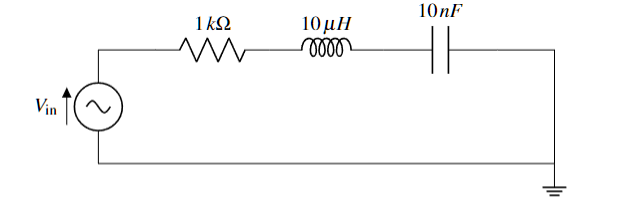

  a) What do you believe the filter's characteristics are? Is it a low-pass, high-pass, band-pass, notch, or neither? Explain your thinking.
  
  b) Find the transfer function of this system. Leave your answer in terms of R, L, and C, and plot the magnitude response.
  
  c) What is the actual shape given by the magnitude response of this filter? Was it or was it not what you initially predicted it would be? How does the Q factor of this filter affect the shape of the magnitude response?
  
  d) When implementing RLC filters, do we want a high resistance load or a low resistance load (again, think how $R$ affects the Q factor)? If we have an ideal filter, what are its advantages compared to a band-pass filter with cutoff frequencies that are very close to each other?